Sanskruti Sharma 
Task1-Prediction using Supervised ML(Beginner Level)
Dataset-http://bit.ly/w-data

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


Properties of dataset

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Checking for null values

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Plotting distribution of scores

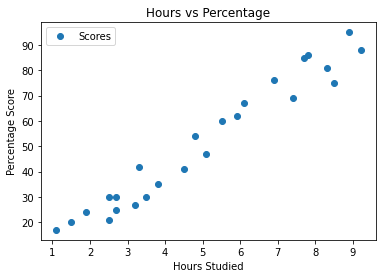

In [8]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Manipulation of data

In [9]:
x=data.iloc[:,:-1]
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
y=data.iloc[:,1]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

 Splitting the Data into Training and Testing Dataset

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

Fitting a Linear Regression Line to the Training Dataset

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
predicted_y=model.predict(x_train)

 Finding the Equation of the Regression Line

In [14]:
print(model.intercept_)
print(model.coef_)
lr_regression= model.coef_*x_train + model.intercept_
print("The equation of the fitted regression line is:")
print("Score=", model.coef_," hours=", model.intercept_)

2.018160041434683
[9.91065648]
The equation of the fitted regression line is:
Score= [9.91065648]  hours= 2.018160041434683


Plotting the Regression Line

Text(0.5, 1.0, 'plot of fitted regression line on the given dataset')

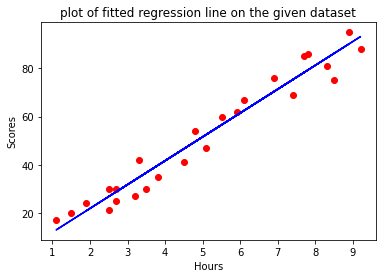

In [15]:
plt.plot(x,y,"o",color="r")
plt.plot(x_train,lr_regression, color="b")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("plot of fitted regression line on the given dataset")

 Predicting the Scores on the Testing Dataset

In [16]:
y_pred= model.predict(x_test)
print("The predicted values of score based on testing dataset is: ", y_pred)

The predicted values of score based on testing dataset is:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing the Actual and the Predicted Score

In [17]:
df= pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Comparing the Actual and the Predicted Score Using a Bar Graph

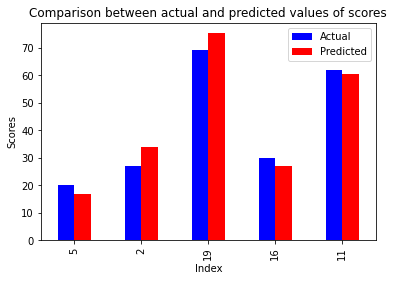

In [23]:
df.plot(kind="bar", color=("b","r"))
plt.xlabel("Index")
plt.ylabel("Scores")
plt.title("Comparison between actual and predicted values of scores")
plt.show()

 Evaluating the Model

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


Problem Statement

In [22]:
print("Percentage score of a student who studies 9.25 hours per day: ", model.predict([[9.25]]))

Percentage score of a student who studies 9.25 hours per day:  [93.69173249]
